Decision Tree

In [48]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [49]:
df = pd.read_csv(r"C:\Users\user\Desktop\trainData.csv")
df


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes
314,58,1,nonanginal,140,211,1,2,165,0,0.0,1,0.0,normal,No
315,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        317 non-null    int64  
 1   Sex        317 non-null    int64  
 2   ChestPain  317 non-null    object 
 3   RestBP     317 non-null    int64  
 4   Chol       317 non-null    int64  
 5   Fbs        317 non-null    int64  
 6   RestECG    317 non-null    int64  
 7   MaxHR      317 non-null    int64  
 8   ExAng      317 non-null    int64  
 9   Oldpeak    317 non-null    float64
 10  Slope      317 non-null    int64  
 11  Ca         314 non-null    float64
 12  Thal       317 non-null    object 
 13  AHD        317 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [51]:
df.duplicated().sum()

80

In [52]:
df=df.drop_duplicates()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        237 non-null    int64  
 1   Sex        237 non-null    int64  
 2   ChestPain  237 non-null    object 
 3   RestBP     237 non-null    int64  
 4   Chol       237 non-null    int64  
 5   Fbs        237 non-null    int64  
 6   RestECG    237 non-null    int64  
 7   MaxHR      237 non-null    int64  
 8   ExAng      237 non-null    int64  
 9   Oldpeak    237 non-null    float64
 10  Slope      237 non-null    int64  
 11  Ca         234 non-null    float64
 12  Thal       237 non-null    object 
 13  AHD        237 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 27.8+ KB


In [54]:
df.shape

(237, 14)

In [55]:
df['AHD']=df['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_16440\4188910922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD']=df['AHD'].apply(lambda x : 1 if x=='Yes' else 0)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        237 non-null    int64  
 1   Sex        237 non-null    int64  
 2   ChestPain  237 non-null    object 
 3   RestBP     237 non-null    int64  
 4   Chol       237 non-null    int64  
 5   Fbs        237 non-null    int64  
 6   RestECG    237 non-null    int64  
 7   MaxHR      237 non-null    int64  
 8   ExAng      237 non-null    int64  
 9   Oldpeak    237 non-null    float64
 10  Slope      237 non-null    int64  
 11  Ca         234 non-null    float64
 12  Thal       237 non-null    object 
 13  AHD        237 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 27.8+ KB


In [57]:
df=df.dropna()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        234 non-null    int64  
 1   Sex        234 non-null    int64  
 2   ChestPain  234 non-null    object 
 3   RestBP     234 non-null    int64  
 4   Chol       234 non-null    int64  
 5   Fbs        234 non-null    int64  
 6   RestECG    234 non-null    int64  
 7   MaxHR      234 non-null    int64  
 8   ExAng      234 non-null    int64  
 9   Oldpeak    234 non-null    float64
 10  Slope      234 non-null    int64  
 11  Ca         234 non-null    float64
 12  Thal       234 non-null    object 
 13  AHD        234 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 27.4+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1481f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1481fa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1481f220>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1481ff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca15728220>],
 'means': []}

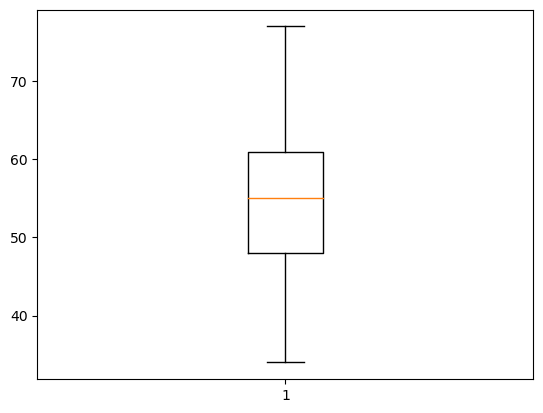

In [28]:
plt.boxplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca162adb70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca162ae0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca162ad8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca162ae5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca162ae890>],
 'means': []}

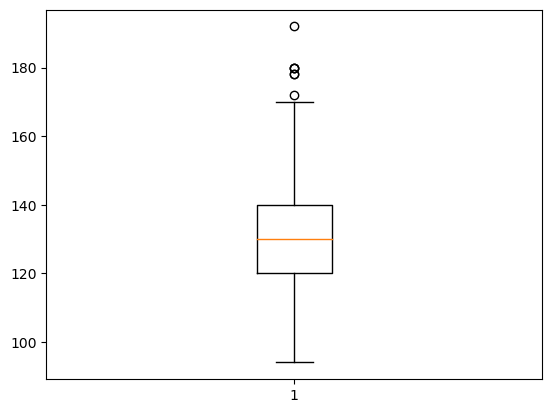

In [61]:
plt.boxplot(df.RestBP)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca157b2da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca157b32e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca157b2b00>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca157b3820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca157b3ac0>],
 'means': []}

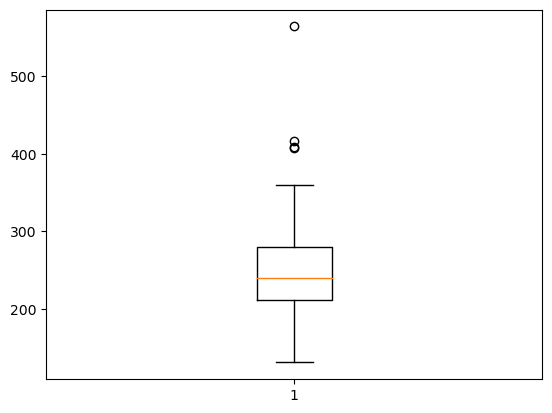

In [30]:
plt.boxplot(df.Chol)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca15824790>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca15824cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca158244f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca15825210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca158254b0>],
 'means': []}

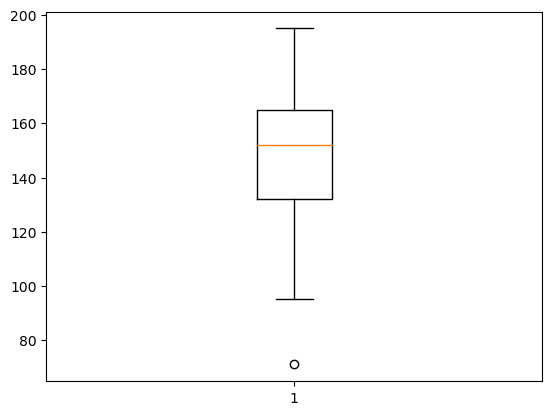

In [31]:
plt.boxplot(df.MaxHR)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1586baf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca15894070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1586b850>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca15894490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca15894730>],
 'means': []}

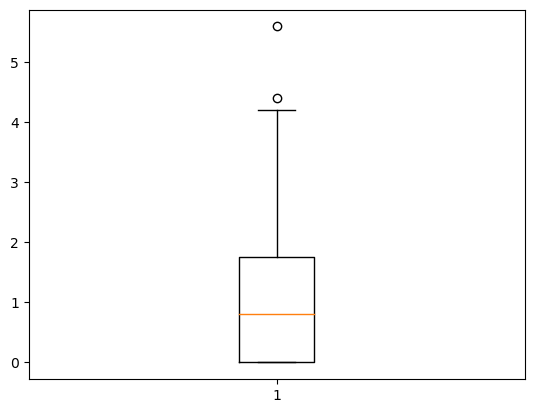

In [32]:
plt.boxplot(df.Oldpeak)

In [75]:
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'])

In [76]:
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,49,1,118,149,0,2,126,0,0.8,1,3.0,1,0,1,0,0,0,1,0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,1,1,0,0,0,0,1,0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,1,0,0,0,1,0,1,0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,1,1,0,0,0,0,0,1
4,47,1,108,243,0,0,152,0,0.0,1,0.0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,42,0,102,265,0,2,122,0,0.6,2,0.0,0,1,0,0,0,0,1,0
311,51,1,110,175,0,0,123,0,0.6,1,0.0,0,0,1,0,0,0,1,0
312,43,0,132,341,1,2,136,1,3.0,2,0.0,1,1,0,0,0,0,0,1
313,63,1,140,187,0,2,144,1,4.0,1,2.0,1,1,0,0,0,0,0,1


In [78]:
# seperate the independent variables
X_train= df.loc[:, df.columns != 'AHD']  

y_train= df.loc[:, df.columns == 'AHD']  


In [79]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,49,1,118,149,0,2,126,0,0.8,1,3.0,0,1,0,0,0,1,0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,1,0,0,0,0,1,0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,0,0,0,1,0,1,0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,1,0,0,0,0,0,1
4,47,1,108,243,0,0,152,0,0.0,1,0.0,0,1,0,0,0,1,0


In [139]:
?tree.DecisionTreeClassifier


In [147]:
dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [148]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

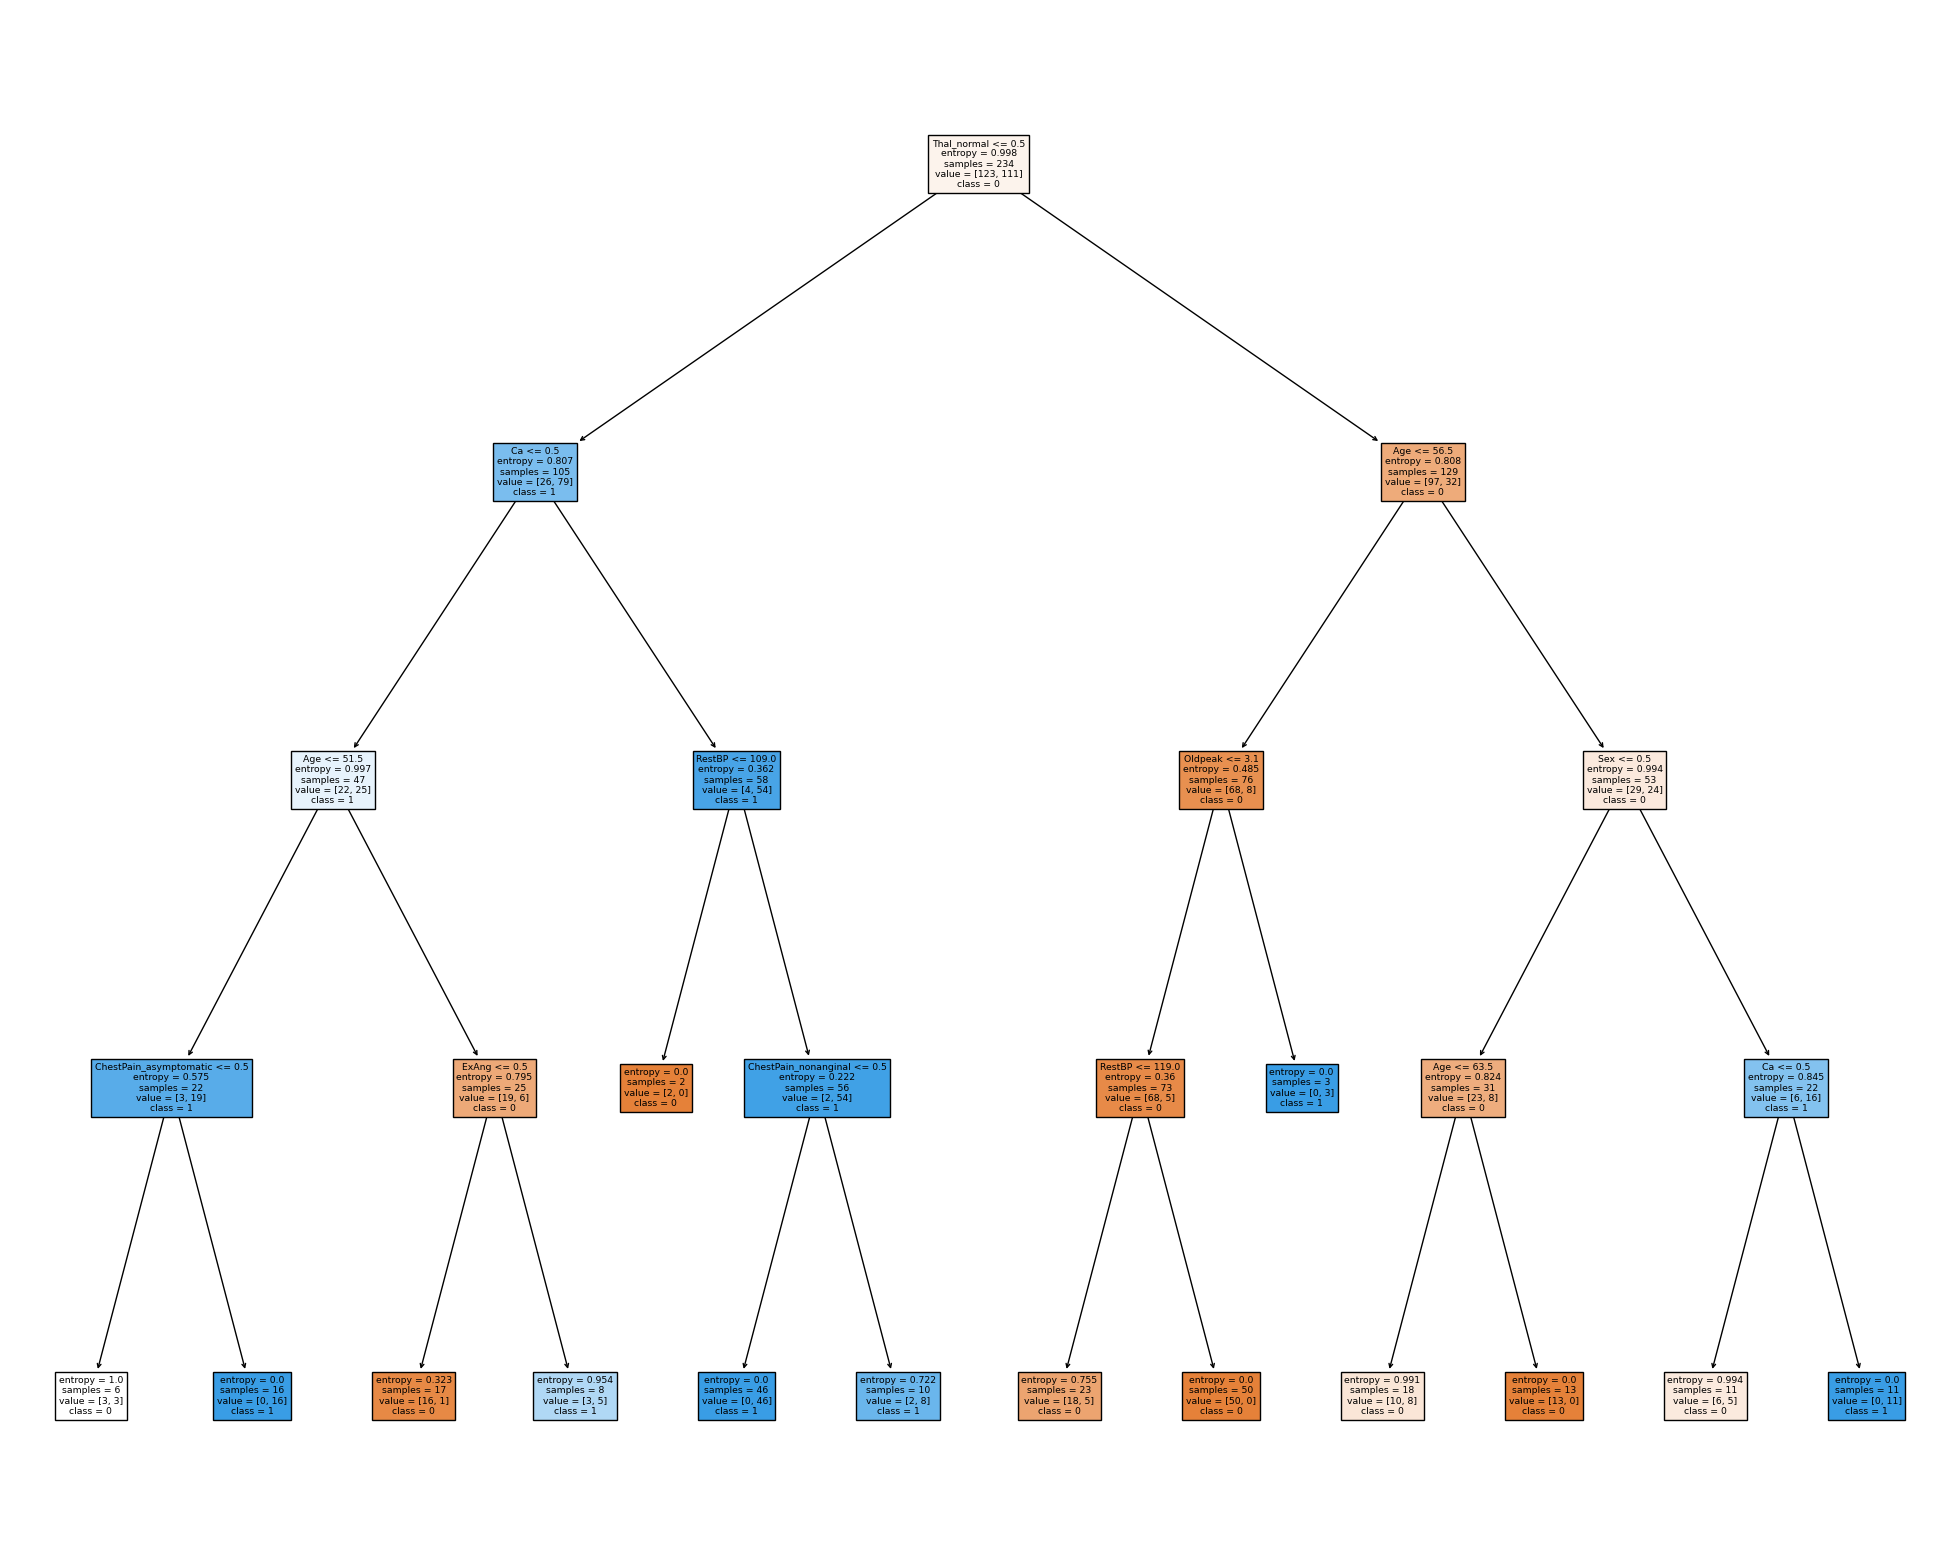

In [149]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)

In [150]:
y_train_pred_class = dtree.predict(X_train)


In [134]:
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
        cm = confusion_matrix( actual, predicted)
        sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
        plt.ylabel('Observed')
        plt.xlabel('Predicted')
        plt.show()
    

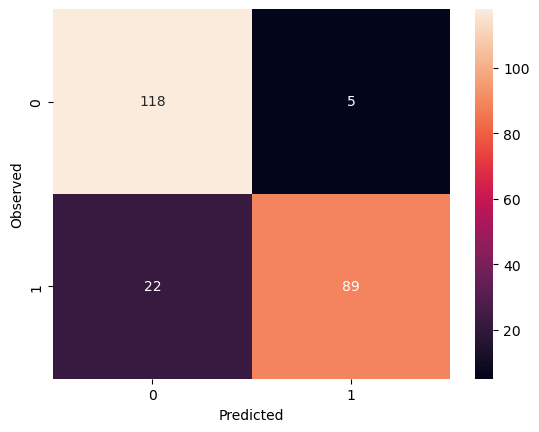

In [151]:
draw_cm(y_train,y_train_pred_class)

In [104]:
df_test = pd.read_csv(r"C:\Users\user\Desktop\testData.csv")
df_test.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes


In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        137 non-null    int64  
 1   Sex        137 non-null    int64  
 2   ChestPain  137 non-null    object 
 3   RestBP     137 non-null    int64  
 4   Chol       137 non-null    int64  
 5   Fbs        137 non-null    int64  
 6   RestECG    137 non-null    int64  
 7   MaxHR      137 non-null    int64  
 8   ExAng      137 non-null    int64  
 9   Oldpeak    137 non-null    float64
 10  Slope      137 non-null    int64  
 11  Ca         137 non-null    int64  
 12  Thal       137 non-null    object 
 13  AHD        137 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 15.1+ KB


In [105]:
df_test['AHD']=df_test['AHD'].apply(lambda x : 1 if x=='Yes' else 0)

df_test= pd.get_dummies(df_test, columns=['ChestPain', 'Thal'])


In [106]:
df_test.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,37,1,130,250,0,0,187,0,3.5,3,0,0,0,1,0,0,0,1,0
1,62,0,140,268,0,2,160,0,3.6,3,2,1,1,0,0,0,0,1,0
2,53,1,140,203,1,2,155,1,3.1,3,0,1,1,0,0,0,0,0,1
3,57,1,140,192,0,0,148,0,0.4,2,0,0,1,0,0,0,1,0,0
4,56,1,130,256,1,2,142,1,0.6,2,1,1,0,1,0,0,1,0,0


In [107]:
X_test= df_test.loc[:, df_test.columns != 'AHD']  

y_test= df_test.loc[:, df_test.columns == 'AHD'] 

In [152]:
dtree.score(X_train,y_train)

0.8846153846153846

In [153]:
dtree.score(X_test,y_test)

0.8248175182481752

In [154]:
y_test_pred_class = dtree.predict(X_test)

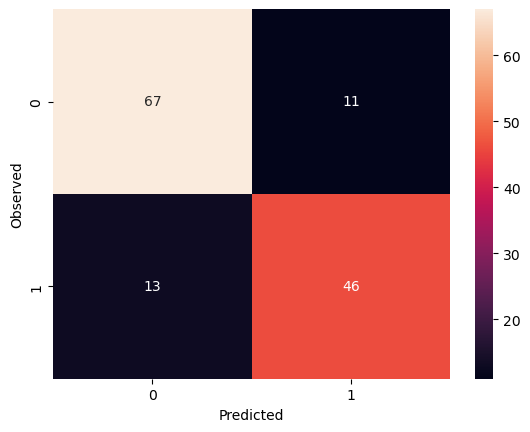

In [155]:
draw_cm(y_test,y_test_pred_class)